# inspect single model


In [1]:
from matplotlib import pyplot as plt
from scipy.special import softmax
from itertools import product
import numpy as np
from utils import *
from model import *
import time
import seaborn as sns
sns.set_context('talk')

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
## timestamp and dir for saving
tstamp = time.perf_counter_ns()
import os
os.mkdir('figures/scratch_folders/%i'%tstamp)

In [3]:
## import human data for fitting
import pandas as pd
hdf = pd.read_csv('../human_data.csv')
humanB_acc,humanI_acc = hdf.loc[:,('blocked mean','interleaved mean')].values.T

In [4]:
## default params
taskargs = {
  'condition':'blocked',
  'n_train':160,
  'n_test':40
}
schargs = {
    'concentration':1.31,
    'stickiness_wi':2000,
    'stickiness_bt':9, # 100
    'sparsity':0.06,
    'pvar': 2,
    'lrate':1,
    'lratep':0.75,
    'decay_rate':0.995,
} 
semargs = {
  'beta2':False
}
args = {
    'sem':semargs,
    'sch':schargs,
    'exp':taskargs
}
param_str = "-".join(["%s_%.3f"%(i,j) for i,j in schargs.items()])
param_str += "-"+"-".join(["%s_%.3f"%(i,j) for i,j in semargs.items()])
param_str

'concentration_1.310-stickiness_wi_2000.000-stickiness_bt_9.000-sparsity_0.060-pvar_2.000-lrate_1.000-lratep_0.750-decay_rate_0.995-beta2_0.000'

### main

In [5]:
ns = 20
L = []
condL = ['blocked','interleaved',
         'early','middle','late'
        ]
exp_batch_data = run_batch_exp_curr(ns,args,condL) # [curr,seeds,{data}]


In [6]:
## accuracy
batch_acc = unpack_acc(exp_batch_data) # curr,seeds,trials
mean_acc = batch_acc.mean(1)
test_acc = mean_acc[:,-40:].mean(1) # curr  
test_acc

array([0.866875  , 0.72765467, 0.8342007 , 0.83415738, 0.9500016 ])

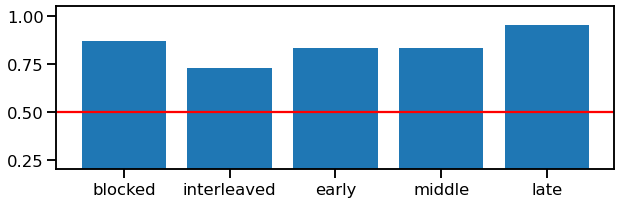

In [7]:
plt.figure(figsize=(10,3))
plt.bar(condL,test_acc)
plt.ylim(0.2,1.05)
plt.axhline(0.5,c='r')

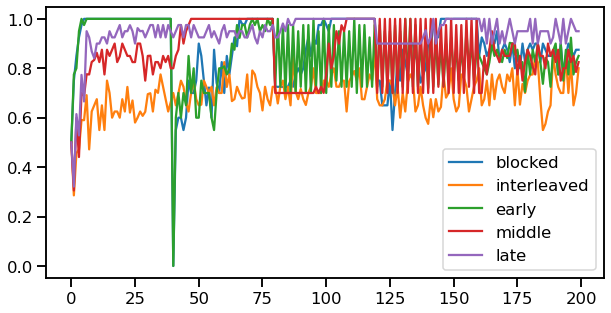

In [8]:
plt.figure(figsize=(10,5))
for idx in range(len(condL)):
  plt.plot(mean_acc[idx],label=condL[idx])
plt.legend()

# model state

In [9]:
curr_idx = 0
seed_idx = 0

In [10]:
priors = unpack_data(exp_batch_data,
        dtype='priors')[curr_idx][seed_idx]
likes = unpack_data(exp_batch_data,
        dtype='likes')[curr_idx][seed_idx]
post = unpack_data(exp_batch_data,
        dtype='post')[curr_idx][seed_idx]


In [11]:
tstep = 3
sch = 0
priors[:,tstep,sch]


array([2003.  , 2006.  , 2009.  , 2012.  , 2015.  , 2018.  , 2021.  ,
       2024.  , 2027.  , 2030.  , 2033.  , 2036.  , 2039.  , 2042.  ,
       2045.  , 2048.  , 2051.  , 2054.  , 2057.  , 2060.  , 2063.  ,
       2066.  , 2069.  , 2072.  , 2075.  , 2078.  , 2081.  , 2084.  ,
       2087.  , 2090.  , 2093.  , 2096.  , 2099.  , 2102.  , 2105.  ,
       2108.  , 2111.  , 2114.  , 2117.  , 2120.  ,  120.75,  120.75,
        120.75, 2122.25, 2124.5 , 2126.75,  127.5 ,  127.5 , 2129.  ,
       2131.25,  132.  ,  132.  ,  132.  ,  132.  , 2133.5 ,  134.25,
        134.25, 2135.75,  136.5 ,  136.5 , 2138.  ,  138.75, 2140.25,
       2142.5 ,  143.25, 2144.75,  145.5 ,  145.5 ,  145.5 ,  145.5 ,
        145.5 , 2147.  ,  147.75,  147.75,  147.75,  147.75,  147.75,
       2149.25,  150.  , 2151.5 , 2154.5 , 2157.5 , 2160.5 , 2163.5 ,
       2166.5 , 2169.5 , 2172.5 , 2175.5 , 2178.5 , 2181.5 , 2184.5 ,
       2187.5 , 2190.5 , 2193.5 , 2196.5 , 2199.5 , 2202.5 , 2205.5 ,
       2208.5 , 2211